In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [19]:
import os
print(os.listdir("../dataset"))

['aps_failure_training_set_processed_8bit.csv', '.DS_Store', 'aps_failure_test_set.csv', 'aps_failure_test_set_processed_8bit.csv', 'aps_failure_training_set.csv']


In [20]:
df = pd.read_csv('../dataset/aps_failure_training_set_processed_8bit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(171)
memory usage: 78.3 MB


In [21]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.992188,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.992188,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.992188,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,-0.992188,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438


Analizemos los valores medios y la varianza de la data

### Usar todas las columnas menos las columnas 'class' como características

In [22]:
features = df.drop(['class'], axis=1)
target = df['class']

# Dividimos el dataset para el entrenamiento 80:20 %
f_train, f_dev, t_train, t_dev = train_test_split(features, target, test_size=0.2, random_state=42)

In [23]:
np.unique(target)

array([-0.9921875,  0.9921875])

### Como se usan numeros reales, se necesita binarizar en dos clases: 0 normal 1 falla

In [24]:
# threshold classes into 0 and 1(failure)
lb = Binarizer()
lb.fit(t_train.values.reshape(-1, 1))
t_train_bi = lb.transform(t_train.values.reshape(-1, 1))
t_dev_bi = lb.transform(t_dev.values.reshape(-1, 1))

In [25]:
np.unique(t_train_bi)

array([0., 1.])

### Para usar PCA necesitamos normalizar la data ya que se encuentra escalada

In [26]:
from sklearn.preprocessing import scale
f_train_norm = scale(f_train)
f_dev_norm = scale(f_dev)

In [11]:
# Comparemos los datos con y sin normalización:
print('Antes de normalizar:\n', f_train[:2])
print('\nDespués de normalizar:\n', f_train_norm[:2])

('Antes de normalizar:\n',         aa_000    ab_000   ac_000    ad_000    ae_000    af_000    ag_000  \
48572 -0.40625 -0.289062 -0.46875 -0.007812 -0.046875 -0.054688 -0.007812   
38696 -0.40625 -0.289062 -0.46875 -0.007812 -0.046875 -0.054688 -0.007812   

        ag_001    ag_002    ag_003    ...       ee_002    ee_003  ee_004  \
48572 -0.03125 -0.054688 -0.117188    ...    -0.382812 -0.382812  -0.375   
38696 -0.03125 -0.054688 -0.117188    ...    -0.382812 -0.382812  -0.375   

         ee_005  ee_006    ee_007    ee_008    ee_009    ef_000    eg_000  
48572 -0.351562 -0.3125 -0.195312 -0.304688 -0.171875 -0.023438 -0.023438  
38696 -0.351562 -0.3125 -0.195312 -0.304688 -0.171875 -0.023438 -0.023438  

[2 rows x 170 columns])
('\nDespu\xc3\xa9s de normalizar:\n', array([[-7.66026639e-01, -6.09221700e-01, -4.77337115e-01,
        -1.66564227e-02, -1.25460568e-01, -1.26119208e-01,
        -3.76524017e-02, -7.64080605e-02, -1.31434087e-01,
        -2.26290675e-01, -3.50083086e-01, -6

### Gráfico de la varianza

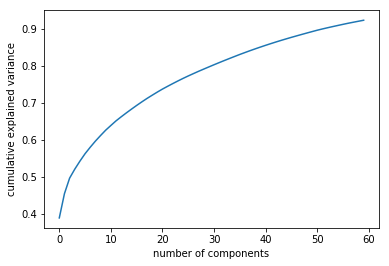

In [28]:
# Varianza de los componentes principales
# plt.bar(pca.explained_variance_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<BarContainer object of 60 artists>

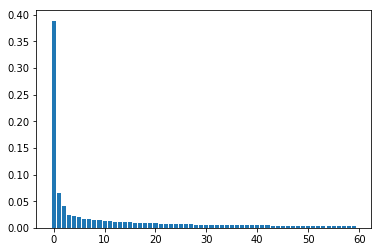

In [29]:
plt.bar(range(60),pca.explained_variance_ratio_)

In [32]:
from sklearn.decomposition import PCA
#Seleccionadmos los principales componentes de PCA
pca = PCA(n_components=60).fit(f_train_norm)

f_pca_train = pca.transform(f_train_norm)
f_pca_dev = pca.transform(f_dev_norm)

### Generamos el training and test set

In [33]:
# Separando data de entrenamiento y prueba
X_train = f_pca_train
X_dev = f_pca_dev
y_train = t_train_bi.reshape(-1,1)
y_dev = t_dev_bi.reshape(-1,1)

### Entrenamos Linear Regression

In [34]:
LR = LinearRegression()
LR.fit(X_train, y_train)
prediction = LR.predict(X_dev)
pred = (prediction > 0.5).astype(int)
print(classification_report(y_dev, pred))

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     11788
        1.0       0.83      0.37      0.51       212

avg / total       0.99      0.99      0.99     12000



In [35]:
resultado = confusion_matrix(y_dev, pred)
print(resultado)

[[11772    16]
 [  134    78]]


### Resultado Linear Regression

In [37]:
print "Falsos negativos",resultado[1,0]
print "Falsos positivos",resultado[0,1]
print "Costo total", (resultado[1,0]*500 + resultado[0,1]*10)

Falsos negativos 134
Falsos positivos 16
Costo total 67160


### Entrenamos Regresión Logística

In [38]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

predictions = LR.predict(X_dev)
pred = (predictions > 0.5).astype(int)
print(classification_report(y_dev, pred))

/Users/luciacervantes/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     11788
        1.0       0.78      0.46      0.58       212

avg / total       0.99      0.99      0.99     12000



In [39]:
resultado = confusion_matrix(y_dev, pred)
print(resultado)

[[11760    28]
 [  115    97]]


### Resultado Regresión Logística

In [40]:
print "Falsos negativos",resultado[1,0]
print "Falsos positivos",resultado[0,1]
print "Costo total", (resultado[1,0]*500 + resultado[0,1]*10)

Falsos negativos 115
Falsos positivos 28
Costo total 57780
